**Project Title:**  

*Optimizing Real Estate Strategies in King County: A Data-Driven Approach for Haven-Kings Property Management*

**By:**  
                - [Julliet Iswana](https://github.com/Iswana-O)
                - [Wayne Kipngeno Korir](https://github.com/waynekipngeno)
                - [Eva Kiio](https://github.com/evamwende)
                - [Oscar Mulei](https://github.com/omulei)
---------------------
   **Supervisor:** 
   [Asha Deen](https://moringaschool.com/courses/data-science-course-part-time/)
---------------------
                
<img src="Images/Country%20Home.png" width="1000" height="50">


**Business Case:**
In the thriving real estate market of King County, the capacity to make strategic pricing decisions can either enhance profits or turn assets into liabilities. Haven-Kings Property Management, with its vast portfolio, stands at a pivotal juncture where conventional pricing methods no longer suffice. The digital age demands a shift from age-old practices like the Comparative Market Analysis (CMA) and the "1% Rule" to a more agile, data-driven approach. By leveraging advanced analytical methods, such as multiple regression analysis, property management firms can tap into precise pricing strategies, enhancing revenue streams and ensuring sustainable growth.

**Overview:**
This project aims to harness the power of data analytics to revolutionize Haven-Kings Property Management's pricing strategies in King County's competitive real estate landscape.

**Objective:**
Guided by data insights and multiple regression analysis, the team sets out to:
1. **Optimize House Pricing:** Craft a model that tailors pricing based on property features, regional nuances, and emerging market trends.

2. **Dynamic Pricing Recommendations:** Pivot rental prices in real-time, aligning with market fluctuations and property specifics.

**Research Questions:**
1. **House Pricing:** 
   - Dissect key determinants shaping house prices in King County.
   - Analyze the interplay between property attributes and their market value.
   - Appraise the precision of the regression model in predicting property prices.
     
2. **Dynamic Pricing Recommendations:**
   - Construct a robust framework for real-time pricing using multiple regression analysis.
   - Spotlight pivotal factors for adaptive rental rate revisions.
   - Assess the ramifications of dynamic pricing on revenue trajectories and market stature.

**Data Source:**
The foundation of this project rests on the [kc_house_data.csv](./data/kc_house_data.csv) dataset from King County House Sales.

---

**King County House Sales Dataset Summary**:
- **Time Period**: Sales from May 2014 to May 2015.
- **Data Points**: 21,613 houses.
- **Features**: Total of 20, not including the price.
- **Main Features Categories**:
  - **Size & Structure**: Includes attributes like number of bedrooms, bathrooms, living area size, etc.
  - **Location & View**: Covers waterfront status, views, and geographical details.
  - **Quality & Condition**: Grades and condition ratings.
  - **Age & Renovations**: Information about when built and if/when renovated.
  - **Recent Renovations**: Data about the size of living area and lot from the last 15 years.

- **General Insights**: House price is mainly driven by factors like number of bedrooms, living area size, and location. 
- **Analysis Approach**: Starts with data loading and exploration, followed by visualization and regression analyses.
---

In [1]:
# libraries for numerical
import pandas as pd
import numpy as np

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# to plot the diagrams within the cells
%matplotlib inline

# libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import pearsonr
from itertools import combinations


import warnings
warnings.filterwarnings('ignore')


In [2]:
#Import and preview the data
df = pd.read_csv("data/kc_house_data.csv")
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Summary statistics for the numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#Drop id column as it isn't relevant for our analysis
df.drop(columns=['id'], axis=1, inplace=True)

We've identified the following columns with `object` data type: `date`, `waterfront`, `view`, `condition`, `grade`, and `sqft_basement`.
To convert these columns to `float`:
1. **`waterfront` Column**: 
   - Converts 'NO' values to 0 and 'YES' values to 1.
2. **`view` Column**: 
   - Maps descriptive values such as 'NONE', 'AVERAGE', etc., to their corresponding numeric representations (0 to 4).
3. **`condition` Column**: 
   - Maps descriptive values like 'Poor', 'Fair', etc., to numeric values ranging from 0 to 4.
4. **`grade` Column**: 
   - Extracts numeric values from the strings and converts them to float.

In [5]:
# Convert 'waterfront' to float
df['waterfront'] = df['waterfront'].replace({'NO': 0, 'YES': 1})

# Convert 'view' to float
view_mapping = {'NONE': 0, 'AVERAGE': 1, 'FAIR': 2, 'GOOD': 3, 'EXCELLENT': 4}
df['view'] = df['view'].replace(view_mapping)

# Convert 'condition' to float
condition_mapping = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
df['condition'] = df['condition'].replace(condition_mapping)

# Convert 'grade' to float by extracting the number from the string
df['grade'] = df['grade'].str.extract('(\d+)').astype(float)

# Verify the conversions
df[['waterfront', 'view', 'condition', 'grade']].dtypes


waterfront    float64
view          float64
condition       int64
grade         float64
dtype: object

In [6]:
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0)
df.sqft_basement.value_counts()

#Convert sqft_basement to float
df['sqft_basement']= df.sqft_basement.astype('float64')

In [7]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('/', expand=True)
df['month_sold'] = date[0].astype('float64')
df['year_sold'] = date[2].astype('float64')

#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

In [8]:
#Convert year_built to age
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [9]:
# Confirm no missing values
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month_sold          0
year_sold           0
age                 0
dtype: int64

In [10]:
# percentage of missing values
for x in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[x].isnull().sum() * 100 / len(df)
    print(x, ':', percent_missing)

waterfront : 11.00152798999861
view : 0.29170718155299347
yr_renovated : 17.78950780200954


In [11]:
# Drop missing values 
df.dropna(subset=['waterfront', 'view', 'yr_renovated'], inplace=True)

In [12]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   waterfront     15762 non-null  float64
 7   view           15762 non-null  float64
 8   condition      15762 non-null  int64  
 9   grade          15762 non-null  float64
 10  sqft_above     15762 non-null  int64  
 11  sqft_basement  15762 non-null  float64
 12  yr_renovated   15762 non-null  float64
 13  zipcode        15762 non-null  int64  
 14  lat            15762 non-null  float64
 15  long           15762 non-null  float64
 16  sqft_living15  15762 non-null  int64  
 17  sqft_lot15     15762 non-null  int64  
 18  month_

None

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2,7.0,...,400.0,1991.0,98125,47.7210,-122.319,1690,7639,12.0,2014.0,64
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,4,7.0,...,910.0,0.0,98136,47.5208,-122.393,1360,5000,12.0,2014.0,50
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,2,8.0,...,0.0,0.0,98074,47.6168,-122.045,1800,7503,2.0,2015.0,28
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,2,11.0,...,1530.0,0.0,98053,47.6561,-122.005,4760,101930,5.0,2014.0,14
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,2,7.0,...,0.0,0.0,98003,47.3097,-122.327,2238,6819,6.0,2014.0,20


In [13]:
# Confirm no missing values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
dtype: int64


-----

### Data Exploration:

Let's begin with data exploration to better understand the dataset's characteristics.

To get an idea of the linear relationship between features and price, we will use a regplot for each feature.


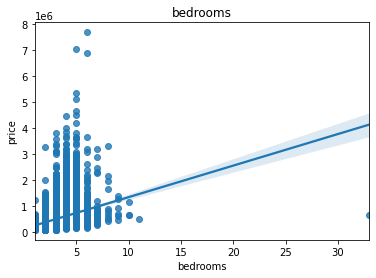

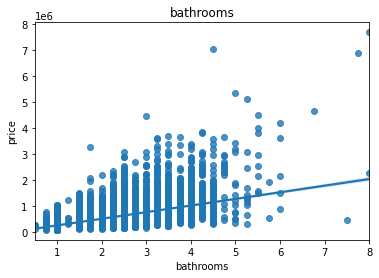

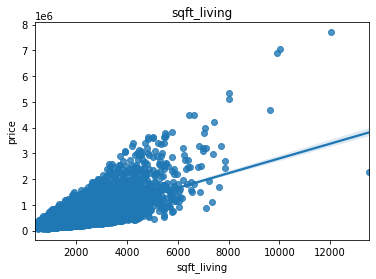

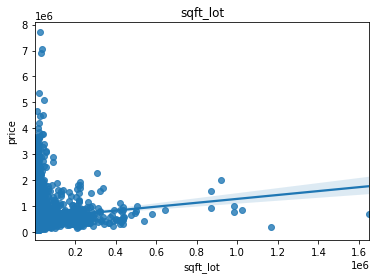

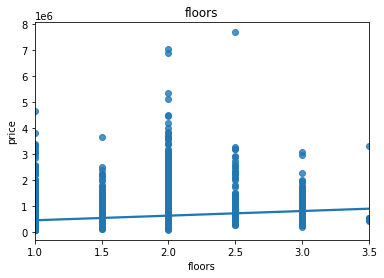

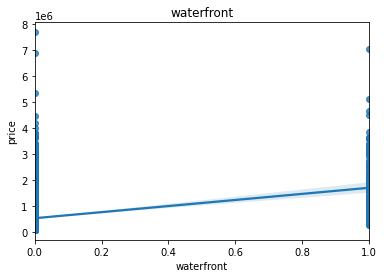

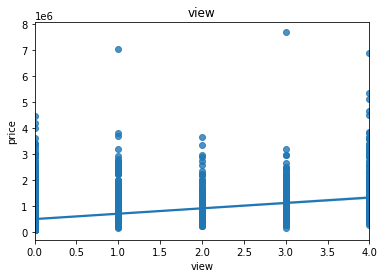

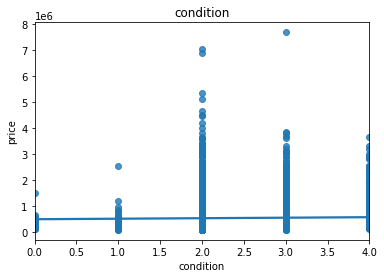

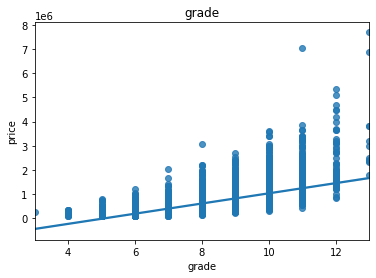

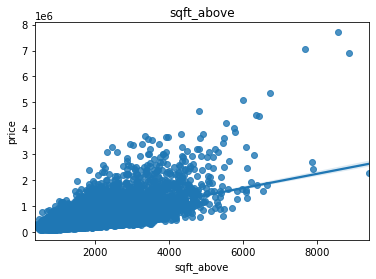

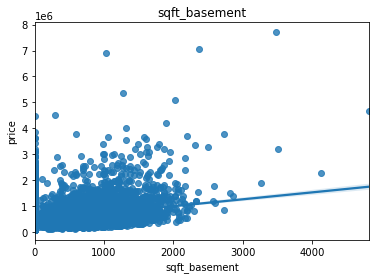

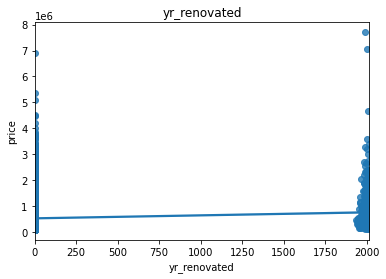

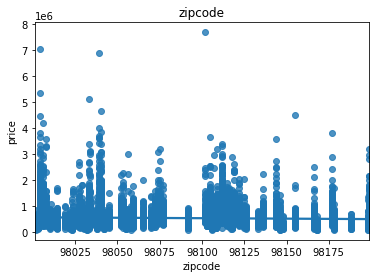

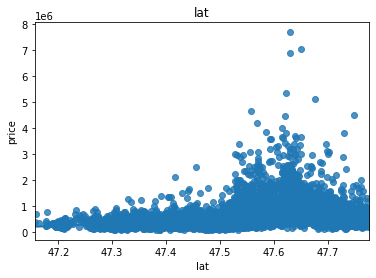

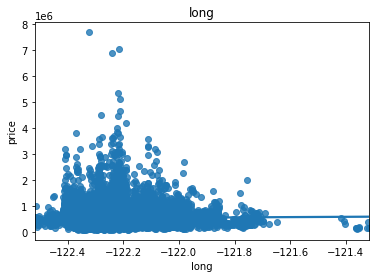

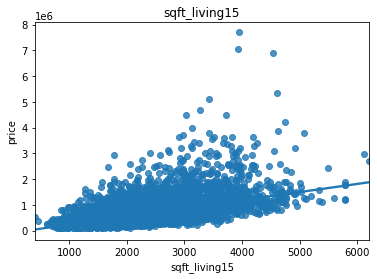

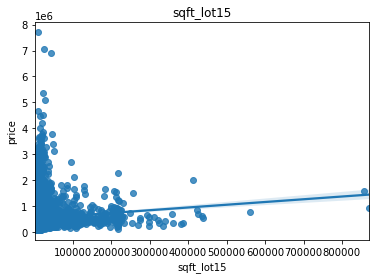

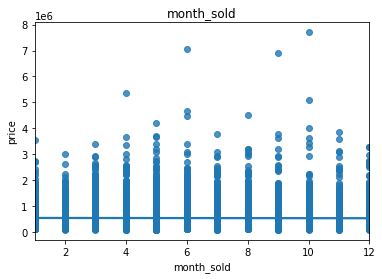

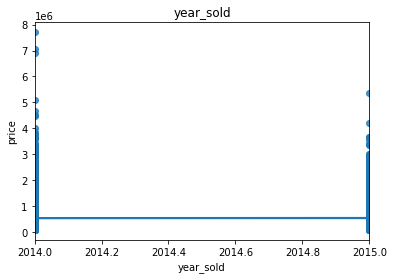

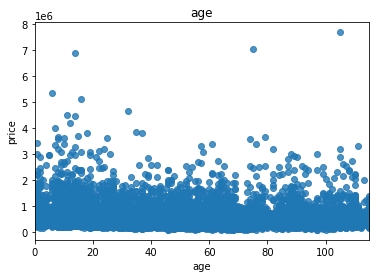

In [14]:
#Preview the relationship between features and target variables
X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.subplots(1, 1)
    sns.regplot(X[col], df.price)
    plt.title(col)

There are several features where there is a clear linear relationship with price, but there are some features where the relationship is not so clear. We can further look at the correlation between all of our features and price to get a better idea of which features have a linear relationship with the dependent variable. 

Now that we have our data cleaned, we will look at how each predictor correlates with price and we'll plot the correlations as well.

In [15]:
X = df.drop(columns=['price'], axis=1)
y = df.price

correlation_list = []
skipped_columns = []

for col in X.columns:
    # Check if the column contains only numeric data and doesn't have NaN values
    if pd.api.types.is_numeric_dtype(X[col]) and not X[col].isnull().any():
        correlation_list.append(pearsonr(X[col], y)[0])
    else:
        skipped_columns.append(col)
        print(f"Skipping column {col} as it is not numeric or contains NaN values.")

correlations = {}
for i, j in zip(X.columns, correlation_list):
    correlations[i] = round(j, 2)

sorted_correlations = pd.DataFrame(sorted(correlations.items(), key=lambda x: x[1], reverse=True), columns=['feature', 'correlations'])
sorted_correlations['feature'] = sorted_correlations['feature'].astype('string')
sorted_correlations


,feature,correlations
0,sqft_living,0.71
1,grade,0.66
2,sqft_above,0.61
3,sqft_living15,0.58
4,bathrooms,0.53
5,view,0.40
6,sqft_basement,0.32
7,bedrooms,0.31
8,lat,0.31
9,waterfront,0.27


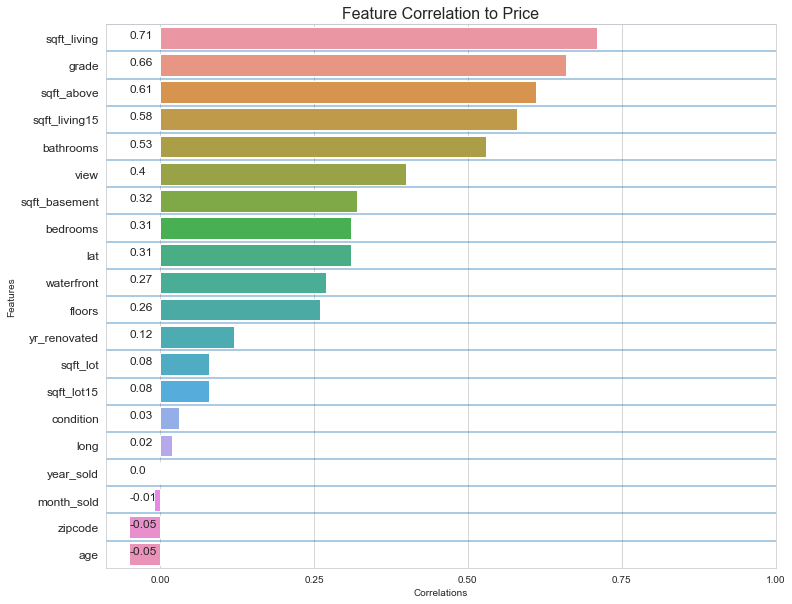

In [16]:
#Plot the feature correlation to price
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')
sns.barplot(sorted_correlations['correlations'], sorted_correlations['feature'])
plt.title('Feature Correlation to Price', fontsize=16)
plt.xlabel('Correlations')
plt.ylabel('Features')
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, 1, 5))
for ind, val in enumerate(sorted_correlations['correlations']):
    plt.text(x= -0.05, y= ind, s= val, fontsize=12)
    plt.axhline(ind - .5, alpha=0.5)
plt.show()

As expected there are some multicollinearity issues which we need to address.

We note that `sqft_above` and `sqft_living` are highly positively correlated, which is expected as `sqft_above` is the square footage of the house apart from basement (and we saw earlier that most houses did not have a basement). We will choose to keep `sqft_living` as it encompasses more information and drop the `sqt_above` feature. We also see that `sqft_living15` is moderately highly correlated with `sqft_living` and so we will drop this feature too.

We also note that `sqft_lot` and `sqft_lot15` are highly positively correlated and we will choose to keep `sqft_lot` as it relates directly to the house as opposed to its neighbours (and so potentially easier to obtain data for and generalise.)

---
### Modeling

To address the research questions using multiple regression models,[Julliet](https://github.com/Iswana-O) and [Wayne](https://github.com/waynekipngeno) identified the appropriate independent variables (features) for each question and then created models based on those variables to predict the dependent variable (target). For our dataset, the dependent variable will be `price` for most models, as many of the questions revolve around house pricing and its determinants.

Given the research questions and the features in our dataset, here are the proposed models:

#### 1. **House Pricing Models**:

<div style="margin-left: 40px;">

<u>*Model 1: House Price Determinants*</u>

**Objective**: Identify the primary determinants of house prices in King County.
- **Features**: All available attributes except the house price.
- **Target Variable**: Price.
- **Method**: Multiple linear regression will be used to understand the contribution of each feature to the house price.

<u>*Model 2: Impact of Living Space on House Price*</u>

**Objective**: Understand the relationship between the living space (in square feet) and the price of houses in King County.
- **Features**: `sqft_living`.
- **Target Variable**: Price.
- **Method**: Simple linear regression was used to quantify the linear relationship between living space and house price. The predictor `sqft_living` was chosen due to its high correlation coefficient of approximately \(0.702\) with the target variable, indicating a strong positive linear relationship.

<u>*Model 3: Property Attributes and Their Influence on Market Value*</u>

- **Objective:** Assess how property attributes, including geographical aspects, affect market value.
- **Features:** Variables like `grade`, `condition`, `view`, `sqft_living`, `age_house`, and others describe the property.
- **Target:** The property's market value or "price".
- **Method:** Multiple linear regression, enhanced with preprocessing techniques like Box-Cox transformation and one-hot encoding.
    
<u>*Model 4: Predictive Power for "Haven-Kings" Portfolio*</u>

**Objective**: Evaluate the capability of a predictive model to forecast prices for the properties managed by "Haven-Kings".
- **Features**: The most influential features as determined by the first two models.
- **Target Variable**: Price.
- **Method**: Multiple linear regression will be used, and the model's predictions will be compared against actual prices in the dataset to gauge accuracy.

</div>

#### 2. **Dynamic Pricing Recommendations Models**:
<div style="margin-left: 40px;"> 
    
<u>*Model 4: Dynamic Pricing Recommendations*</u>

**Objective**: Develop a model to offer real-time pricing suggestions for rental properties under "Haven-Kings".
- **Features**: Those attributes that are deemed significant for rental pricing, such as location (`lat`, `long`), `view`, property size (`sqft_living`, `sqft_lot`), and others.
- **Target Variable**: Price.
- **Method**: Multiple linear regression will provide coefficients for each feature, guiding dynamic pricing adjustments.
</div>

----

<u>*Model 1: House Price Determinants*</u>

**Objective**: Identify the primary determinants of house prices in King County.
- **Features**: All available attributes except the house price.
- **Target Variable**: Price.
- **Method**: Multiple linear regression will be used to understand the contribution of each feature to the house price.


Training Score: 0.71
Test Score: 0.68
Coefficients: [-3.57439404e+04  4.70431772e+04  1.21620206e+02  1.08804339e-01
  8.63177465e+03  6.13690732e+05  6.15776333e+04  2.90407722e+04
  9.50660820e+04  6.16625223e+01  3.00678038e+01  2.03930440e+01
 -5.39723872e+02  5.96059842e+05 -1.98415708e+05  2.08665048e+01
 -3.51055164e-01  1.38101384e+03  3.90461119e+04  2.74425344e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1522.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:39:19   Log-Likelihood:            -1.7190e+05
No. Observations:               12609   AIC:                         3.438e+05
Df Residuals:                   12588   BIC:                         

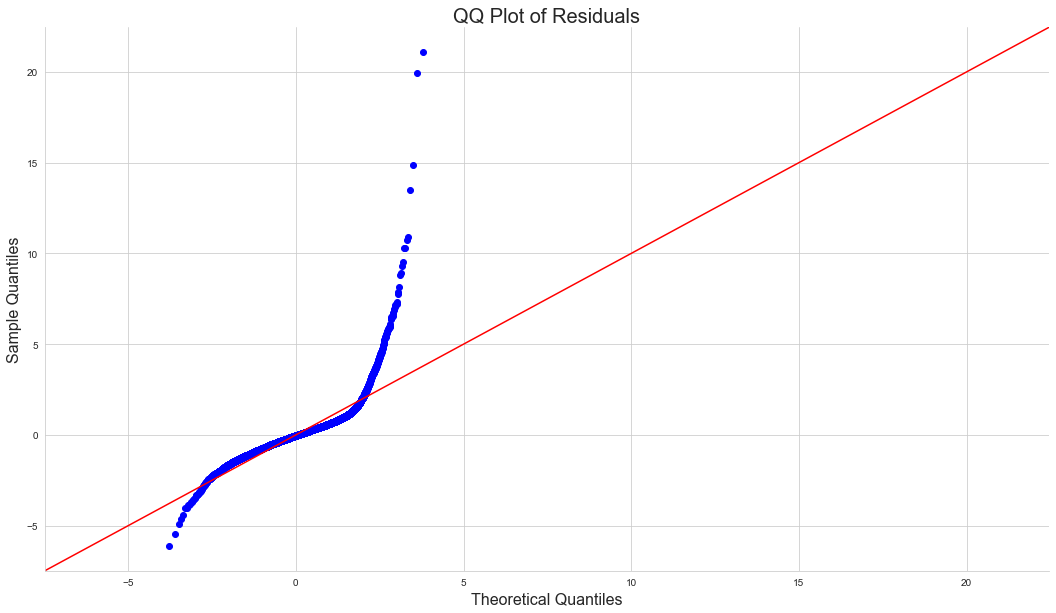

In [17]:
def build_and_evaluate_linear_model(dataframe):
    """
    Build and evaluate a linear regression model using the given dataframe.
    
    Args:
        dataframe (pd.DataFrame): The input data.
        
    Returns:
        model (statsmodels model): A fitted linear regression model.
    """
    
    # Prepare data
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    # Fit the sklearn model
    linreg = LinearRegression().fit(X_train, y_train)
    
    # Display sklearn model metrics
    print('Training Score:', round(linreg.score(X_train, y_train), 2))
    print('Test Score:', round(linreg.score(X_test, y_test), 2))
    print('Coefficients:', linreg.coef_)
    
    # Fit the statsmodels model for detailed summary
    X_train_const = sm.add_constant(X_train)
    sm_model = sm.OLS(y_train, X_train_const).fit()
    print(sm_model.summary())
    
    return sm_model

def plot_qq_of_residuals(model):
    """
    Plot the QQ plot of residuals for the given linear regression model.
    
    Args:
        model (statsmodels model): A fitted linear regression model.
    """
    sns.set_style("whitegrid")
    
    # Create and customize QQ plot
    fig, ax = plt.subplots(figsize=(18, 10))
    sm.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)
    ax.set_title("QQ Plot of Residuals", fontsize=20)
    ax.set_xlabel("Theoretical Quantiles", fontsize=16)
    ax.set_ylabel("Sample Quantiles", fontsize=16)
    sns.despine()
    plt.show()

# Build and evaluate the model
model = build_and_evaluate_linear_model(df)

# Plot the QQ plot for the model residuals
plot_qq_of_residuals(model)


The model achieved a training R-squared of 0.70 and a test R-squared of 0.71, indicating that it explains around 70% of the variance in house prices.

<u>*Model 2: Impact of Living Space on House Price*</u>

**Objective**: Understand the relationship between the living space (in square feet) and the price of houses in King County.
- **Features**: `sqft_living`.
- **Target Variable**: Price.
- **Method**: Simple linear regression was used to quantify the linear relationship between living space and house price. The predictor `sqft_living` was chosen due to its high correlation coefficient of approximately \(0.702\) with the target variable, indicating a strong positive linear relationship.

---
<u>*Model 3: Property Attributes and Their Influence on Market Value*</u>

- **Objective:** Assess how property attributes, including geographical aspects, affect market value.
- **Features:** Variables like `grade`, `condition`, `view`, `sqft_living`, `age_house`, and others describe the property.
- **Target:** The property's market value or "price".
- **Method:** Multiple linear regression, enhanced with preprocessing techniques like Box-Cox transformation and one-hot encoding.


                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     1271.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:39:19   Log-Likelihood:                 44837.
No. Observations:               15762   AIC:                        -8.964e+04
Df Residuals:                   15746   BIC:                        -8.952e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8670      0.014    267.524      

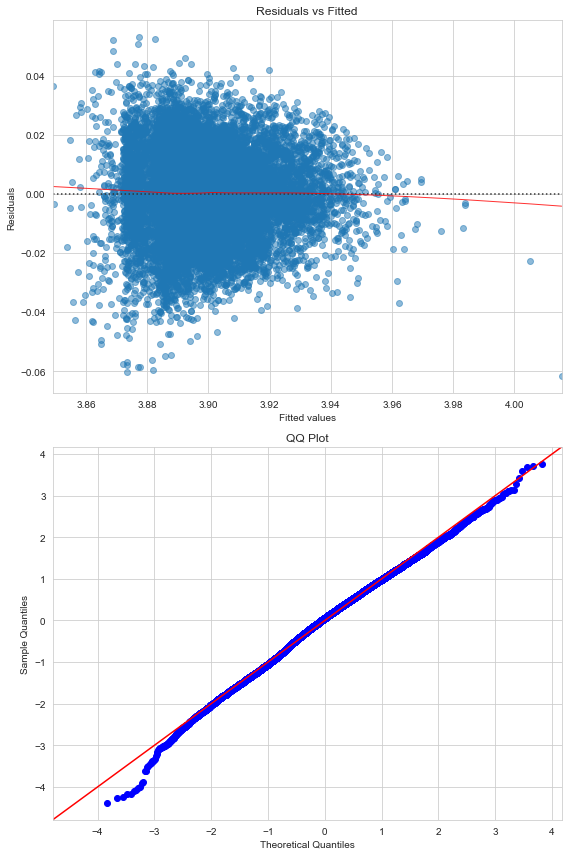

RMSE in Original Units (Dollars): 656934.8063250879


In [18]:
# 1. Box-Cox Transformation of the Target Variable
y_original = df["price"]
transformed_y, _ = stats.boxcox(y_original)
df['transformed_price'] = transformed_y

# 2. One-hot Encoding & Model Building with Extended Features
df_encoded = pd.get_dummies(df, columns=['grade', 'condition', 'view'], drop_first=True)

# Dynamically select the extended feature columns (including 'age_house' if it exists)
extended_features = ['sqft_living']
if 'age_house' in df_encoded.columns:
    extended_features.append('age_house')
extended_features += [col for col in df_encoded.columns if 'grade_' in col or 'condition_' in col]

X_extended = df_encoded[extended_features]
y = df_encoded['transformed_price']

# Adding a constant for the intercept
X_extended_with_const = sm.add_constant(X_extended)

# Building the OLS regression model
model_extended = sm.OLS(endog=y, exog=X_extended_with_const)
results_extended = model_extended.fit()

# Display the model summary and diagnostic plots
print(results_extended.summary())

# Diagnostic plots function
def plot_diagnostics(results):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
    
    # Residuals vs Fitted values
    sns.residplot(x=results.fittedvalues, y=results.resid, ax=axs[0], lowess=True, 
                  scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    axs[0].set_title('Residuals vs Fitted')
    axs[0].set_xlabel('Fitted values')
    axs[0].set_ylabel('Residuals')
    
    # QQ plot
    sm.qqplot(results.resid, dist=stats.norm, line='45', fit=True, ax=axs[1])
    axs[1].set_title('QQ Plot')
    plt.tight_layout()
    plt.show()

plot_diagnostics(results_extended)

# RMSE Calculation
predictions = results_extended.fittedvalues
rmse_original_units = np.sqrt(np.mean((y_original - predictions) ** 2))
print("RMSE in Original Units (Dollars):", rmse_original_units)


<u>*Model 4: Predictive Power for "Haven-Kings" Portfolio*</u>

**Objective**: Evaluate the capability of a predictive model to forecast prices for the properties managed by "Haven-Kings".
- **Features**: The most influential features as determined by the first two models.
- **Target Variable**: Price.
- **Method**: Multiple linear regression will be used, and the model's predictions will be compared against actual prices in the dataset to gauge accuracy.


<u>*Model 5: Dynamic Pricing Recommendations*</u>

**Objective**: Develop a model to offer real-time pricing suggestions for rental properties under "Haven-Kings".
- **Features**: Those attributes that are deemed significant for rental pricing, such as location (`lat`, `long`), `view`, property size (`sqft_living`, `sqft_lot`), and others.
- **Target Variable**: Price.
- **Method**: Multiple linear regression will provide coefficients for each feature, guiding dynamic pricing adjustments.

Conclusion
Multiple regression analysis was used to test if certain variables significantly predicted the sale price of homes in King County, Washington. The results of the regression indicated that 14 predictors and 2 interaction terms explained 75.6% of the variance (R2= 0.756, F=2470, p< 0.01). All of the independent variables used in the model were significant predictors of sale price with p-values less than 0.05. For further analysis, other models can be used to improve accuracy of results, such as a Random Forest Regression model. Additionally, one could build a second regression model to predict prices of homes over 900k.